In [43]:
#Import the dependencies
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 

In [44]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [45]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [46]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [47]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

xichang cn
guider cm
khatanga ru
mrirt ma
manoel urbano br
atuona pf
saint-philippe re
vila do maio cv
muisne ec
busselton au
ushuaia ar
seryshevo ru
bredasdorp za
bolungarvik is
albany au
gorontalo id
saskylakh ru
leshukonskoye ru
saint-francois gp
butaritari ki
rikitea pf
touros br
souillac mu
khonuu ru
khatanga ru
rikitea pf
marcona pe
lana it
zheleznodorozhnyy ru
bathsheba bb
samusu ws
diffa ne
qaanaaq gl
kitahiroshima jp
barentsburg sj
busselton au
coihaique cl
flinders au
zaykovo ru
hobart au
nanortalik gl
lorengau pg
avarua ck
tuktoyaktuk ca
nanortalik gl
rikitea pf
canchungo gw
punta arenas cl
albany au
attawapiskat ca
vanimo pg
punta arenas cl
vaini to
bayir jo
airai pw
east london za
ixtapa mx
sioux lookout ca
issenye tz
ribeira grande pt
busselton au
balkanabat tm
scottsburgh za
ostrovnoy ru
kapaa us
port augusta au
vaitupu wf
saldanha za
lagoa pt
georgetown us
illoqqortoormiut gl
albany au
hailey us
shangqiu cn
airai pw
mataura pf
sankt florian at
coquimbo cl
longyearbyen s

punta arenas cl
georgetown sh
orlik ru
egvekinot ru
cockburn town bs
punta arenas cl
tiksi ru
yellowknife ca
sentyabrskiy ru
saint-philippe re
anloga gh
chuy uy
igarka ru
avera pf
miri my
hilo us
kloulklubed pw
kosh-agach ru
east london za
viligili mv
mataura pf
qui nhon vn
kodiak us
rathkeale ie
ribeira grande pt
anopino ru
arman ru
carauari br
tuktoyaktuk ca
khatanga ru
bethel us
port-gentil ga
mount gambier au
padang id
katsuura jp
rikitea pf
albany au
viedma ar
albany au
dikson ru
klyuchi ru
velikiy ustyug ru
jibuti dj
saint-augustin ca
iqaluit ca
codrington ag
amahai id
drochia md
thompson ca
trinidad uy
nobeoka jp
savannakhet la
galiakot in
rikitea pf
kapaa us
longyearbyen sj
punta arenas cl
ribeira grande pt
chuy uy
albany au
bambous virieux mu
cape town za
kutum sd
thompson ca
barrow us
poum nc
houston ca
hermanus za
bluff nz
troitskoye ru
punta arenas cl
palabuhanratu id
butaritari ki
barrow us
bonao do
rikitea pf
verkhnevilyuysk ru
safaga eg
barrow us
leningradskiy ru
butarit

taolanaro mg
kapaa us
sapouy bf
barrow us
okhotsk ru
esperance au
sao filipe cv
jamestown sh
namibe ao
ushuaia ar
east london za
dandong cn
hobart au
kalmunai lk
zapolyarnyy ru
busselton au
busselton au
srednekolymsk ru
praia da vitoria pt
fortuna us
the valley ai
tuktoyaktuk ca
lorengau pg
sao lourenco do sul br
ryotsu jp
castro cl
tasiilaq gl
faanui pf
hilo us
tsienyane bw
kropotkin ru
rikitea pf
luanda ao
bluff nz
cherskiy ru
esperance au
sola vu
busselton au
rikitea pf
diffa ne
cabo san lucas mx
vila franca do campo pt
saskylakh ru
tautira pf
hambantota lk
makakilo city us
saskylakh ru
mar del plata ar
iralaya hn
timbiqui co
dudinka ru
yellowknife ca
albany au
dali cn
butaritari ki
cape town za
ahipara nz
provideniya ru
vanimo pg
mataura pf
hobart au
bluff nz
khatanga ru
taolanaro mg
busselton au
finschhafen pg
rikitea pf
sao joao da barra br
hermanus za
mayo ca
nikolskoye ru
saldanha za
kortkeros ru
richards bay za
yellowknife ca
punta arenas cl
porto novo cv
saint-philippe re
her

In [48]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [49]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [50]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2439be442e195c8f5968524cfc17a8b0


In [51]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [52]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | xichang
Processing Record 2 of Set 1 | guider
Processing Record 3 of Set 1 | khatanga
Processing Record 4 of Set 1 | mrirt
City not found. Skipping...
Processing Record 5 of Set 1 | manoel urbano
Processing Record 6 of Set 1 | atuona
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | vila do maio
Processing Record 9 of Set 1 | muisne
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | seryshevo
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | bolungarvik
City not found. Skipping...
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | gorontalo
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | leshukonskoye
Processing Record 19 of Set 1 | saint-francois
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | rikitea
Processin

Processing Record 38 of Set 4 | ayagoz
Processing Record 39 of Set 4 | pomabamba
Processing Record 40 of Set 4 | cidreira
Processing Record 41 of Set 4 | mora
Processing Record 42 of Set 4 | hilo
Processing Record 43 of Set 4 | provideniya
Processing Record 44 of Set 4 | kodiak
Processing Record 45 of Set 4 | nuuk
Processing Record 46 of Set 4 | fairbanks
Processing Record 47 of Set 4 | south lake tahoe
Processing Record 48 of Set 4 | kargasok
Processing Record 49 of Set 4 | shache
Processing Record 50 of Set 4 | ursulo galvan
Processing Record 1 of Set 5 | kizlyar
Processing Record 2 of Set 5 | tromso
Processing Record 3 of Set 5 | puerto baquerizo moreno
Processing Record 4 of Set 5 | misratah
Processing Record 5 of Set 5 | cabo san lucas
Processing Record 6 of Set 5 | general roca
Processing Record 7 of Set 5 | tessalit
Processing Record 8 of Set 5 | arlit
Processing Record 9 of Set 5 | sao filipe
Processing Record 10 of Set 5 | sentyabrskiy
City not found. Skipping...
Processing Re

Processing Record 32 of Set 8 | toora-khem
Processing Record 33 of Set 8 | nalut
Processing Record 34 of Set 8 | lokosovo
Processing Record 35 of Set 8 | ler
Processing Record 36 of Set 8 | novobureyskiy
Processing Record 37 of Set 8 | kokopo
Processing Record 38 of Set 8 | areosa
Processing Record 39 of Set 8 | machiques
Processing Record 40 of Set 8 | saint george
Processing Record 41 of Set 8 | salalah
Processing Record 42 of Set 8 | salinopolis
Processing Record 43 of Set 8 | ouro preto do oeste
Processing Record 44 of Set 8 | kawana waters
City not found. Skipping...
Processing Record 45 of Set 8 | komsomolskiy
Processing Record 46 of Set 8 | rudbar
Processing Record 47 of Set 8 | belmonte
Processing Record 48 of Set 8 | sousa
Processing Record 49 of Set 8 | lubumbashi
Processing Record 50 of Set 8 | qaqortoq
Processing Record 1 of Set 9 | ponta do sol
Processing Record 2 of Set 9 | tipuani
Processing Record 3 of Set 9 | sambava
Processing Record 4 of Set 9 | preobrazheniye
Proces

Processing Record 19 of Set 12 | palmer
Processing Record 20 of Set 12 | asheboro
Processing Record 21 of Set 12 | demerval lobao
Processing Record 22 of Set 12 | ipil
Processing Record 23 of Set 12 | naze
Processing Record 24 of Set 12 | talca
Processing Record 25 of Set 12 | enterprise
Processing Record 26 of Set 12 | hokitika
Processing Record 27 of Set 12 | marabba
Processing Record 28 of Set 12 | barawe
City not found. Skipping...
Processing Record 29 of Set 12 | parfenyevo
Processing Record 30 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 31 of Set 12 | sandovo
Processing Record 32 of Set 12 | semey
Processing Record 33 of Set 12 | chatellerault
Processing Record 34 of Set 12 | sapouy
Processing Record 35 of Set 12 | okhotsk
Processing Record 36 of Set 12 | dandong
Processing Record 37 of Set 12 | zapolyarnyy
Processing Record 38 of Set 12 | sao lourenco do sul
Processing Record 39 of Set 12 | ryotsu
Processing Record 40 of Set 12 | tsienyane
City not foun

In [53]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Xichang,27.90,102.26,50.81,68,99,4.52,CN,2020-11-01 23:28:27
1,Guider,9.93,13.95,79.61,28,11,6.29,CM,2020-11-01 23:28:28
2,Khatanga,71.97,102.50,5.32,95,99,6.17,RU,2020-11-01 23:28:28
3,Manoel Urbano,-8.84,-69.26,79.30,63,71,0.85,BR,2020-11-01 23:28:28
4,Atuona,-9.80,-139.03,77.47,79,68,15.12,PF,2020-11-01 23:28:28
5,Saint-Philippe,-21.36,55.77,69.80,60,90,8.05,RE,2020-11-01 23:28:29
6,Vila Do Maio,15.13,-23.22,77.00,69,20,6.93,CV,2020-11-01 23:28:29
7,Muisne,0.60,-80.03,75.52,86,58,10.09,EC,2020-11-01 23:23:32
8,Busselton,-33.65,115.33,59.00,74,72,5.37,AU,2020-11-01 23:26:13
9,Ushuaia,-54.80,-68.30,59.00,51,75,19.46,AR,2020-11-01 23:28:29


In [54]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [55]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [56]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1604273480.051518

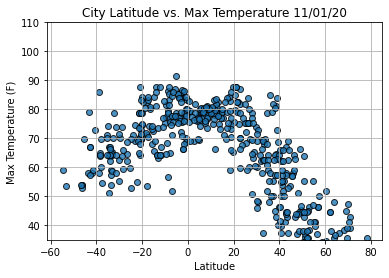

In [57]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.ylim(35, 110)
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

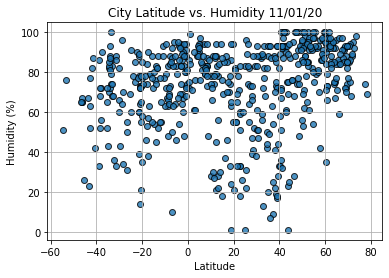

In [58]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

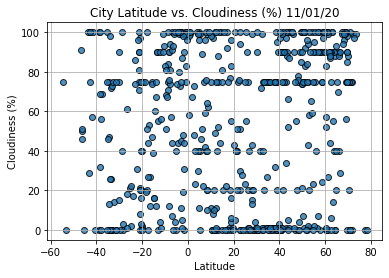

In [59]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

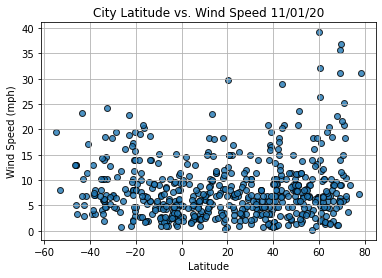

In [60]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [79]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [80]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [81]:
index13 = city_data_df.loc[13]
index13

City                    Gorontalo
Lat                          0.54
Lng                        123.06
Max Temp                    79.39
Humidity                       72
Cloudiness                    100
Wind Speed                   4.79
Country                        ID
Date          2020-11-01 23:28:30
Name: 13, dtype: object

In [86]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
556    False
557     True
558     True
559     True
560     True
Name: Lat, Length: 561, dtype: bool

In [87]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Xichang,27.90,102.26,50.81,68,99,4.52,CN,2020-11-01 23:28:27
1,Guider,9.93,13.95,79.61,28,11,6.29,CM,2020-11-01 23:28:28
2,Khatanga,71.97,102.50,5.32,95,99,6.17,RU,2020-11-01 23:28:28
6,Vila Do Maio,15.13,-23.22,77.00,69,20,6.93,CV,2020-11-01 23:28:29
7,Muisne,0.60,-80.03,75.52,86,58,10.09,EC,2020-11-01 23:23:32
...,...,...,...,...,...,...,...,...,...
554,Porto Novo,6.50,2.60,79.23,88,22,7.94,BJ,2020-11-01 23:29:01
557,Maine-Soroa,13.21,12.02,77.59,22,52,9.93,NE,2020-11-01 23:31:18
558,Sassandra,4.95,-6.08,76.73,92,11,5.14,CI,2020-11-01 23:31:19
559,Novoagansk,61.94,76.66,25.56,97,88,12.21,RU,2020-11-01 23:31:19


In [88]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

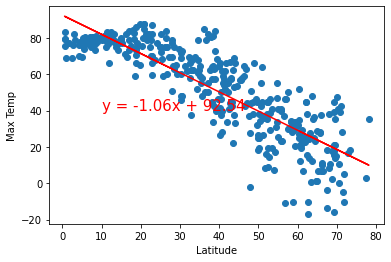

In [111]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere \n for Maximum Temperature','Max Temp',(10,40))

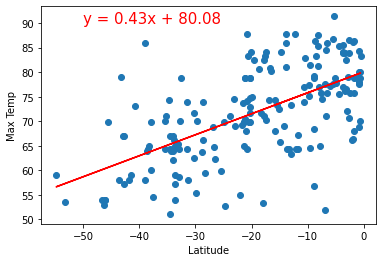

In [108]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

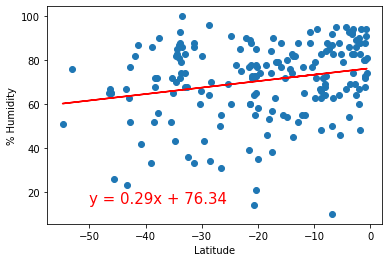

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

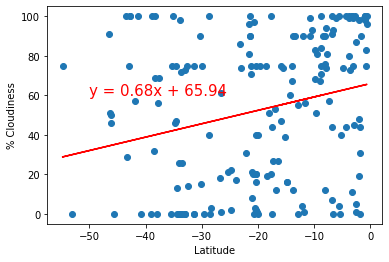

In [95]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

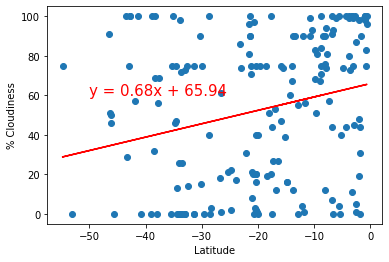

In [102]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

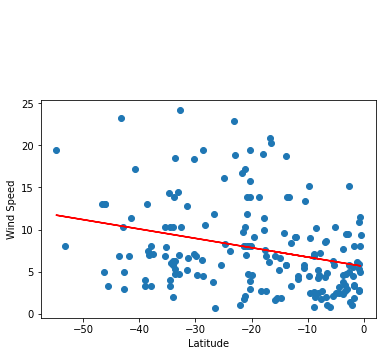

In [107]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,"Linear Regression on the Southern Hemisphere \n for Wind Speed", 'Wind Speed',(-50,35))